# Solid H$_2$ Mass Fraction in the ISM
* Use simulation data of Füglistaler & Pfenniger 2017 (https://arxiv.org/abs/1712.01160)
* Interpolate results

### import matplotlib, numpy, scipy and classes of loci

In [1]:
from numpy import *

from loci import Interpolation, Range

In [2]:
%matplotlib inline 
from matplotlib.pyplot import *
from scipy import *

rcParams['figure.figsize'] = (10, 6)
rcParams.update({'font.size': 16})

#Plotting Colors
lin  = ["#000000", "#FF0000", "#0000FF", "#FFA500", "#008000", "#808080", 
        "#800080", "#008080"]

### Load simulation data

In [3]:
a   = loadtxt("Av.out")

ns  = log10(a[..., 0])
Ts  = log10(a[..., 1])

cAv = log10(a[..., 2])
cStd= log10(a[..., 3])

ii = argsort(Ts)

Ts  = Ts[ii]
ns  = ns[ii]
cAv = cAv[ii]

### Plot raw data, save to 2D list

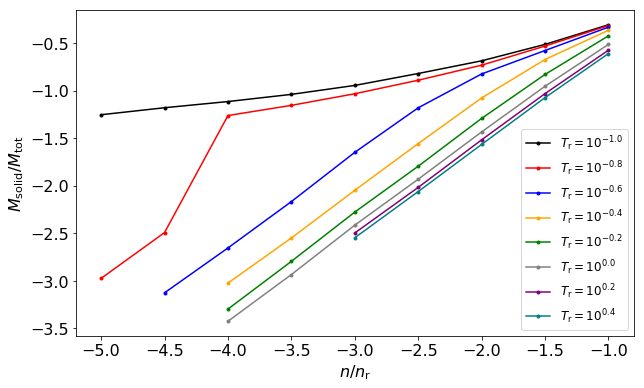

In [4]:
cc = around(Ts*10).astype("i")/2+5
cs = []

for i in r_[0:8]:
    Ti = i*0.2 -1
    
    ii = where(cc == i)[0]
    nii = ns[ii]
    
    jj = argsort(nii)
    njj = nii[jj]
    Ajj = (cAv[ii])[jj]
    
    cs.append(Ajj)
    
    plot(njj, Ajj, ".-", color=lin[i], label=r"$T_\mathrm{r}=10^{%0.1f}$"%Ti)
    
legend(loc=0, fontsize=12)
xlabel("$n/n_\mathrm{r}$")
ylabel("$M_\mathrm{solid}/M_\mathrm{tot}$")

### Define extrapolation function

In [5]:
def msolid(i, n):
    M = [2.016, 1.3512, 0.942, 0.7101, 0.5732, 0.4822, 0.4363]
    return n + M[i-1]

### Extrapolate missing data

In [6]:
ms        = ones((8, 9))
nn        = r_[-5:-0.5:0.5]

ms[0,:]   = cs[0]
ms[1,:]   = cs[1]

ms[2, 1:] = cs[2]
ms[2, 0]  = msolid(2, nn[0])

ms[3, 2:] = cs[3]
ms[3, :2] = msolid(3, nn[:2])

ms[4, 2:] = cs[4]
ms[4, :2] = msolid(4, nn[:2])

ms[5, 2:] = cs[5]
ms[5, :2] = msolid(5, nn[:2])

ms[6, 4:] = cs[6]
ms[6, :4] = msolid(6, nn[:4])

ms[7, 4:] = cs[7]
ms[7, :4] = msolid(7, nn[:4])

### Plot 8x9 data-points including extrapolated data

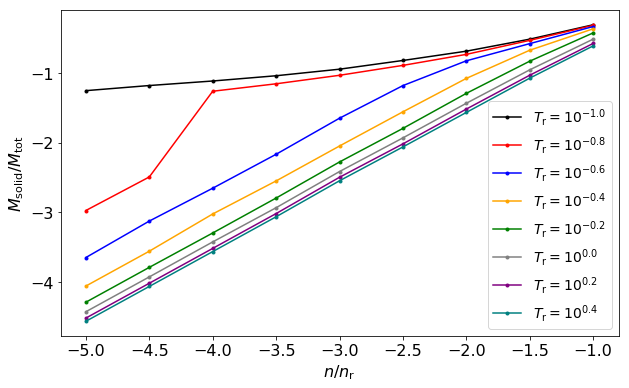

In [7]:
for i in r_[0:len(ms)]:   
    Ti = i*0.2 -1
    plot(nn, ms[i], ".-", color=lin[i], label=r"$T_\mathrm{r}=10^{%0.1f}$"%Ti)   

legend(loc=0, fontsize=14)
xlabel("$n/n_\mathrm{r}$")
ylabel("$M_\mathrm{solid}/M_\mathrm{tot}$")

### Calculate d/dT, d/dn and d$^2$/dT/dn

In [8]:
dn = 0.5
dT = 0.2

ms_T, ms_n = gradient(ms, dT, dn)
ms_Tn      = gradient(ms_n, dT, dn)[0]

### Define grid ranges and interpolation

In [9]:
rT  = Range(-1., 0.2, len(ms))   
rn  = Range(-5., 0.5, len(nn))

ip  = Interpolation(rT, rn, ms, ms_T, ms_n, ms_Tn)

### Plot interpolated data

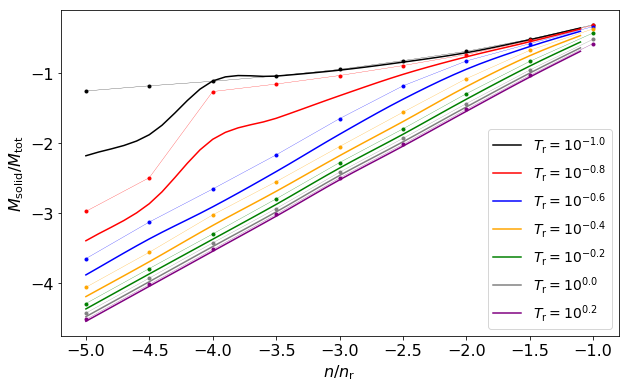

In [11]:
nns = r_[-5:-1:0.1]
i   = 0
for T in r_[-0.9:0.4:0.2]:
    Ti = i*0.2 -1
    
    plot(nns, ip.map(T*ones(len(nns)), nns),color=lin[i], label=r"$T_\mathrm{r}=10^{%0.1f}$"%Ti)
    plot(nn, ms[i], ".-", color=lin[i], linewidth=0.25)
    i += 1
    
legend(loc=0, fontsize=14)
xlabel("$n/n_\mathrm{r}$")
ylabel("$M_\mathrm{solid}/M_\mathrm{tot}$")

### Plot gradient

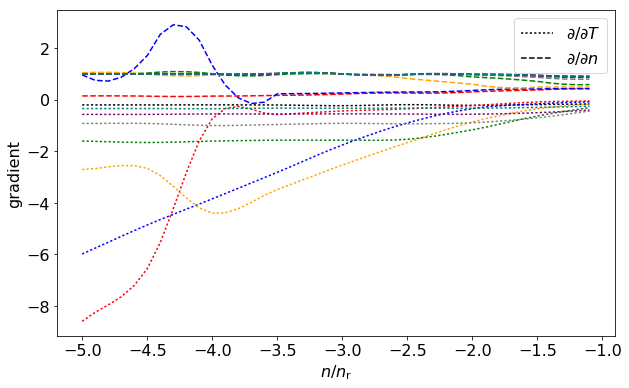

In [12]:
plot(nns, ip.map_x(T*ones(len(nns)), nns), ":", color=lin[0], label="${\partial/\partial T}$")
plot(nns, ip.map_y(T*ones(len(nns)), nns), "--", color=lin[0], label="${\partial/\partial n}$")

i = 1

for T in r_[-1:0.4:0.2]:
    plot(nns, ip.map_x(T*ones(len(nns)), nns), ":", color=lin[i])
    plot(nns, ip.map_y(T*ones(len(nns)), nns), "--", color=lin[i])
    i += 1

legend(loc=0)
xlabel("$n/n_\mathrm{r}$")
ylabel("gradient")